<a href="https://colab.research.google.com/github/deepakk7195/IISC_CDS_DS/blob/Business_Analytics/MiniProject_2_EDA_Timeseries_Team12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Exploratory Data Analysis - Timeseries

## Problem Statement

Perform Exploratory Data Analysis (EDA) of Retail Sales time series data using visualizations and statistical methods.

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform Exploratory data analysis (EDA) of the time series
* perform Time series behaviour analysis in qualitative and quantitative terms
* summarize the findings based on the EDA

## Dataset

The dataset is a French retail company quarterly sales data that has been made available from  Prof. Rob Hyndman's ["Forecasting Methods & Applications"](https://robjhyndman.com/forecasting/) book. There are 24 entries, from 2012-03-31 to 2017-12-31 (Quarterly sales values).

## Introduction

Exploratory data analysis of time series data starts with data visualization.

- Are there consistent patterns?
- Is there a significant trend?
- Is seasonality important?
- Is there evidence of the presence of business cycles?
- Are there any outliers in the data that need to be explained by those with expert knowledge?
- How strong are the relationships among the variables available for analysis?

Various tools have been developed to help with these analyses.

## Grading = 10 Points

In [ ]:
#@title Download Dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/Datasets/ts_frenchretail.csv

### Importing libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-white')
%matplotlib inline
import scipy
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import month_plot, seasonal_plot, quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import signal
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)

<ipython-input-2-1e22105a2b88>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


### Import the Data

In [ ]:
# Read dataset with 'Date' column as index
data = pd.read_csv('ts_frenchretail.csv', parse_dates=['Date'], index_col='Date')

# Display the first few rows of the dataframe
print(data.head())

             Sales
Date              
2012-03-31  362000
2012-06-30  385000
2012-09-30  432000
2012-12-31  341000
2013-03-31  382000


## Exploratory Data Analysis

### **Preprocessing** (1 point)

#### Divide the sales by 1000

Sales numbers are in thousands, so divide by 1000 to make it easier to work with numbers

In [ ]:
# Divide the sales figures by 1000 to scale down to thousands
data['Sales'] = data['Sales'] / 1000

# Display the updated first few rows of the dataframe to verify the change
print(data.head())

            Sales
Date             
2012-03-31  362.0
2012-06-30  385.0
2012-09-30  432.0
2012-12-31  341.0
2013-03-31  382.0


#### Check for missing values     

In [ ]:
# Check for missing values in the dataset

# Count missing values per column
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Check if there are any missing values in the entire dataframe
total_missing = data.isnull().any().any()
print(total_missing)
print("Are there any missing values in the dataset?", "Yes" if total_missing else "No")

Missing values in each column:
 Sales    0
dtype: int64
False
Are there any missing values in the dataset? No


### **Visualization**

#### Visualize the time series (2012 to 2017) (1 point)

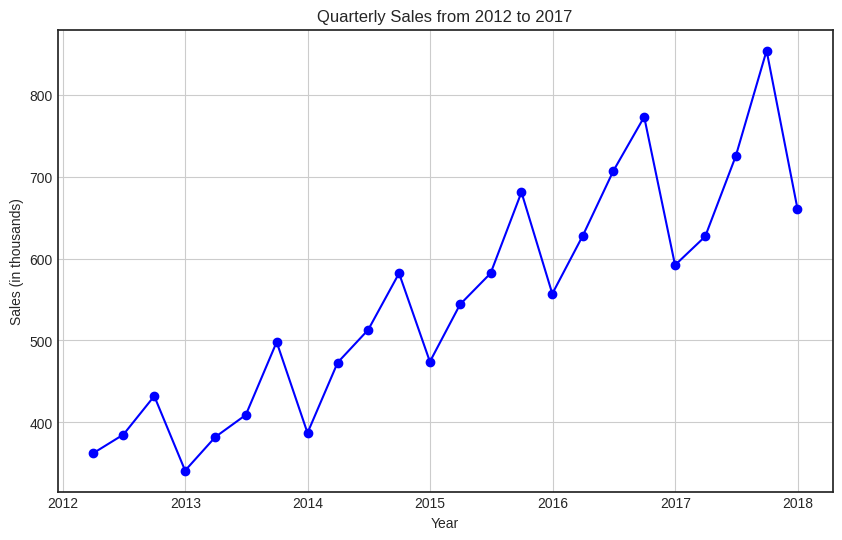

In [ ]:
# Plotting the time series data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Sales'], marker='o', linestyle='-', color='b')
plt.title('Quarterly Sales from 2012 to 2017')
plt.xlabel('Year')
plt.ylabel('Sales (in thousands)')
plt.grid(True)
plt.show()

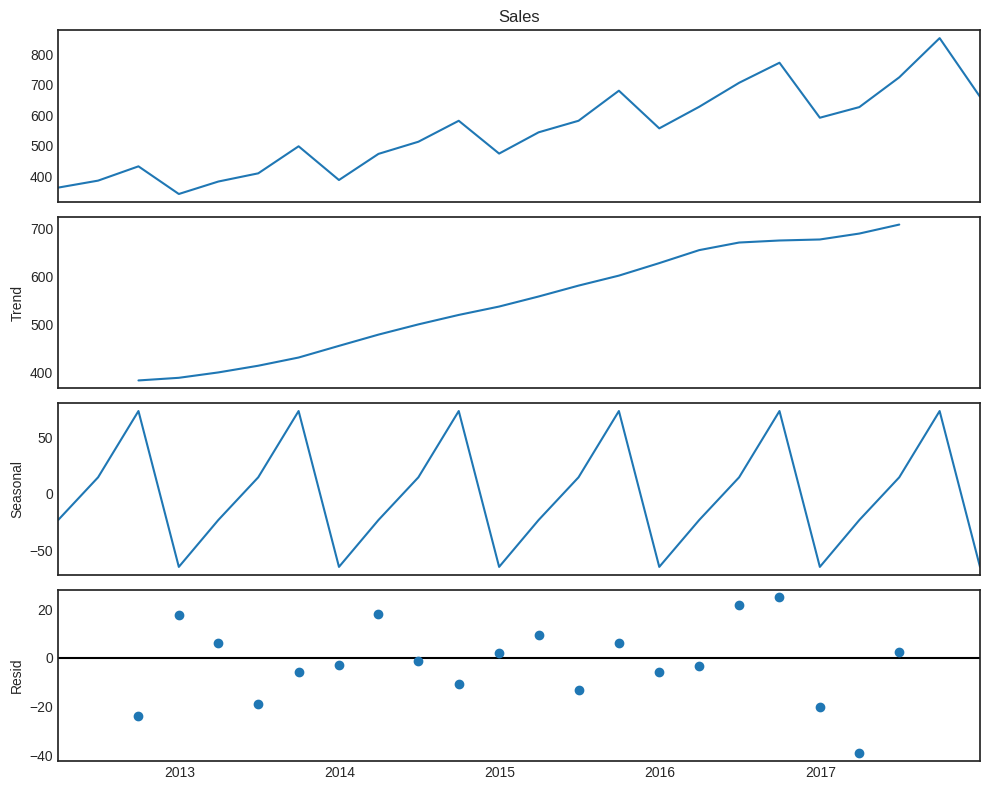

In [ ]:
# Decompose the time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(data['Sales'], model='additive')

# Plotting the decomposed components
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.tight_layout()
plt.show()

**Trend:** A clear upward trend in sales over the years, indicating growth in the company's revenue. <br>
**Seasonality:** Observable seasonality patterns suggest that sales fluctuate within each year, possibly peaking in certain quarters. <br>
**Residuals:** Random fluctuations that were not explained by the trend or seasonality,can be attributed to unrecorded external factors. <br>

#### Visualize the data year-wise and quarter-wise (2 points)

- Box plot to see distribution of sales in each year
- Create year-wise subplots to visualize the quarterly Sales per year
- Compute Percentage growth each year

Make a report of your observations.

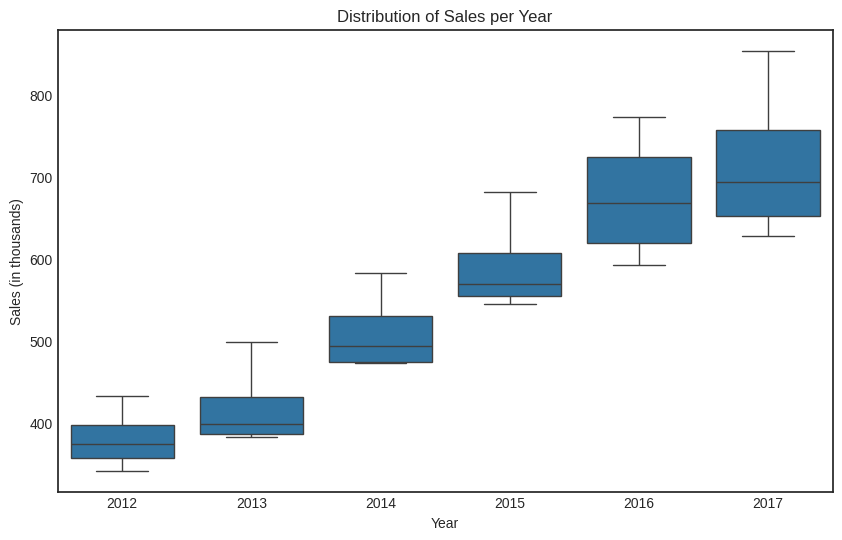

In [ ]:
# Box plot to see distribution of sales in each year
data['Year'] = data.index.year
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Sales', data=data)
plt.title('Distribution of Sales per Year')
plt.xlabel('Year')
plt.ylabel('Sales (in thousands)')
plt.show()

Variability in sales seems to increase over the years as reflected by the widening of the interquartile ranges.
--add bubbles in the boxplot to see the data

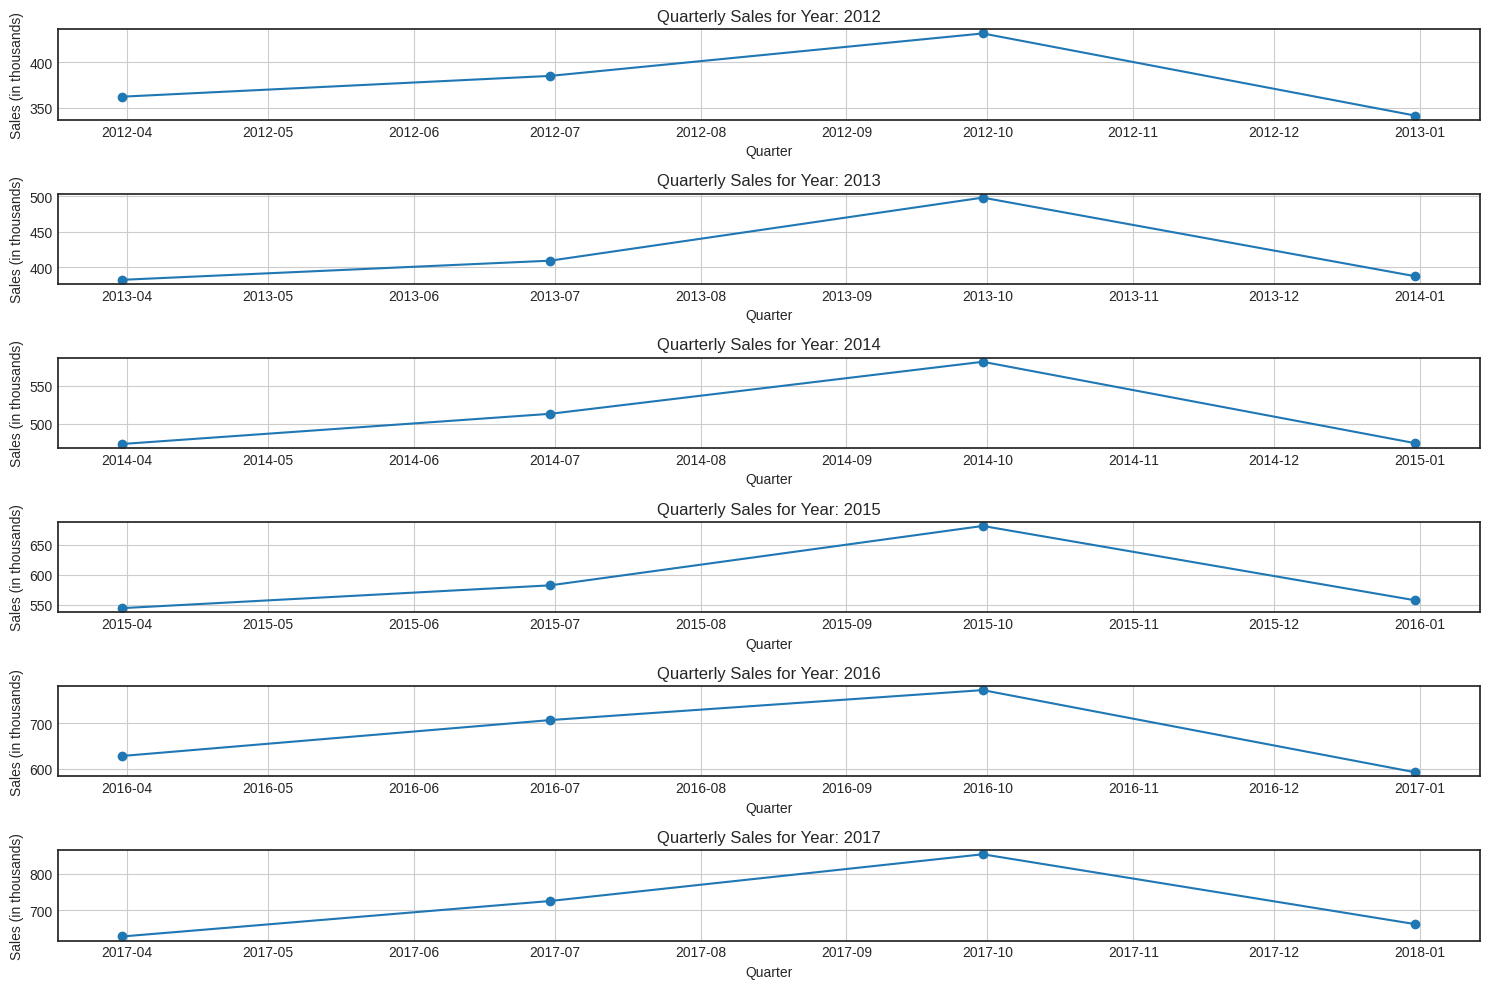

In [ ]:
# Create year-wise subplots to visualize the quarterly Sales per year
years = data['Year'].unique()
plt.figure(figsize=(15, 10))
for i, year in enumerate(years, 1):
    plt.subplot(len(years), 1, i)
    plt.plot(data[data['Year'] == year]['Sales'], marker='o', linestyle='-')
    plt.title('Quarterly Sales for Year: {}'.format(year))
    plt.xlabel('Quarter')
    plt.ylabel('Sales (in thousands)')
    plt.grid(True)
plt.tight_layout()
plt.show()

There is an increase in sales over the years with some quarters showing higher sales values, which can be attributes to seasonal sales surge

In [ ]:
# Percentage growth each year
annual_sales = data['Sales'].resample('A').sum()
percentage_growth = annual_sales.pct_change() * 100
print("Percentage growth each year:\n", percentage_growth.dropna())

Percentage growth each year:
 Date
2013-12-31    10.263158
2014-12-31    21.837709
2015-12-31    15.768854
2016-12-31    14.213198
2017-12-31     6.185185
Freq: A-DEC, Name: Sales, dtype: float64


Spike in growth during 2014, which could be explored further for underlying causes such as market expansions but deceleration in growth by 2017, which might suggest market saturation

# Observation Report

## Exploratory Data Analysis Report: French Retail Company Sales Data (2012-2017) <br>
**1. Introduction** <br>
This report presents an exploratory analysis of quarterly sales data from a French retail company from 2012 to 2017, sourced from Prof. Rob Hyndman's "Forecasting Methods & Applications." The objective is to identify underlying patterns, trends, seasonality, and other insights that can aid in understanding the sales dynamics and potentially guide future business strategies. <br>

**2. Data Overview** <br>
The dataset comprises quarterly sales data over six years, with each entry representing the total sales for a quarter. Initial data handling involved scaling the sales figures down to thousands to simplify analysis. <br>

**3. Data Quality Assessment** <br>
Our preliminary data check confirmed no missing values in the dataset, indicating that the sales data is complete for the entire period without any gaps. <br>

**4. Trend and Seasonality Analysis** <br>
The decomposition of the time series revealed:

**Trend:** A clear upward trend in sales over the years, indicating growth in the company's revenue. <br>
**Seasonality:** Observable seasonality patterns suggest that sales fluctuate within each year, possibly peaking in certain quarters. <br>
**Residuals:** Random fluctuations that were not explained by the trend or seasonality,can be attributed to unrecorded external factors. <br>

**5. Yearly Sales Distribution** <br>
A box plot analysis for yearly sales distribution highlighted: <br>

A general increase in the median sales from 2012 to 2017.
Variability in sales seems to increase over the years as reflected by the widening of the interquartile ranges. <br>

**6. Quarterly Sales Performance** <br>
Year-wise breakdown of quarterly sales visualizations indicated: <br>

Steady increases within most years.
Specific quarters repeatedly showing higher or lower sales, reinforcing identified seasonal patterns. <br>

**7. Annual Sales Growth** <br>
The calculated percentage growth year-over-year illustrated: <br>

A significant spike in growth during 2014, which could be explored further for underlying causes such as market expansions or successful marketing campaigns. <br>
A deceleration in growth by 2017, which might suggest market saturation or increased competition. <br>

**8. Summary of Findings** <br>
The company has shown a positive growth trajectory from 2012 to 2017. <br>
Sales exhibit clear seasonal patterns which could be utilized for strategic planning. <br>

#### Visualize the distribution of the Sales (0.5 point)

While normally distributed data is not a requirement for forecasting and doesn't necessarily improve point forecast accuracy, it can help stablize the variance and narrow the prediction interval.

Report your observations.

Hint: `sns.distplot()`

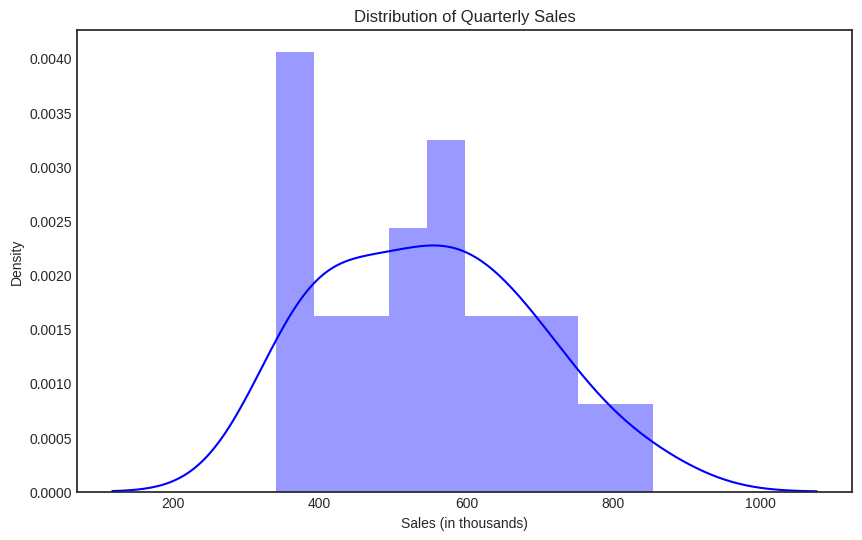

In [ ]:
# Visualizing the distribution of Sales data
plt.figure(figsize=(10, 6))
sns.distplot(data['Sales'], bins=10, kde=True, color='blue')
plt.title('Distribution of Quarterly Sales')
plt.xlabel('Sales (in thousands)')
plt.ylabel('Density')
plt.show()

# Observation Report

## Analysis Report on the Distribution of Quarterly Sales <br>

**Distribution Analysis** <br>
The histogram with an overlaid kernel density estimate (KDE) provides a visual representation of the sales distribution. <br>

**Key Observations:** <br>
**1. Non-Normal Distribution:** <br>

The data does not appear to be normally distributed as the histogram does not follow the bell-shaped curve suggested by the KDE. This indicates that the sales data may have underlying factors influencing its distribution which are not accounted for by simple normal distribution assumptions. <br>

**2. Multimodality:** <br>

The distribution shows multiple peaks (bimodal distribution), which suggests that there are potentially two different modes of sales volumes within the quarters. This could reflect different sales behaviors in different parts of the year, possibly influenced by seasonal effects.

**3. Right Skewness:** <br>

The distribution is right-skewed, as evidenced by a longer tail on the right side. This skewness indicates that there are quarters with exceptionally high sales that pull the mean to the right. <br>

**4. Implications for Forecasting:** <br>

The presence of skewness and bimodality suggests that variance stabilization might be necessary for more effective forecasting.

#### Visualize Quarterly trends (1 point)

Create quarterly subplots to visualize the data in each quarter across all years

Hint: statsmodels' `quarter_plot()` method

<Figure size 1200x600 with 0 Axes>

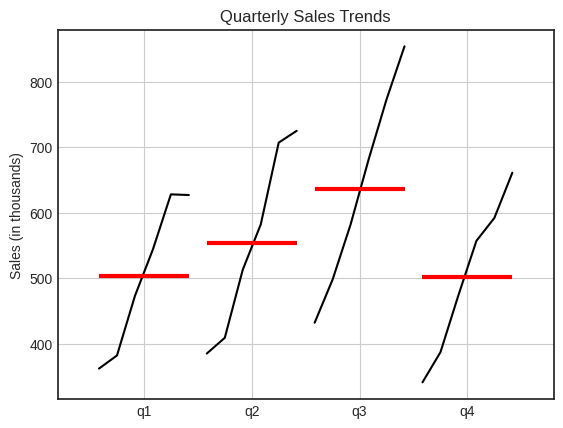

In [ ]:
# Create quarterly subplots to visualize the data in each quarter across all years
plt.figure(figsize=(12, 6))
quarter_plot(data['Sales'])
plt.title('Quarterly Sales Trends')
plt.ylabel('Sales (in thousands)')
plt.grid(True)
plt.show()

The mean is higher for quarterly sales for Q3 across all years

#### Visualize the distribution of Sales in each year within a single plot (1 point)

- Do the distribution peaks shift to the right from 2012 to 2017? What does this indicate?
- Is there a change in the width of the distributions from 2012 to 2017? What does it signify?

Hint: `sns.distplot(hist=False)`

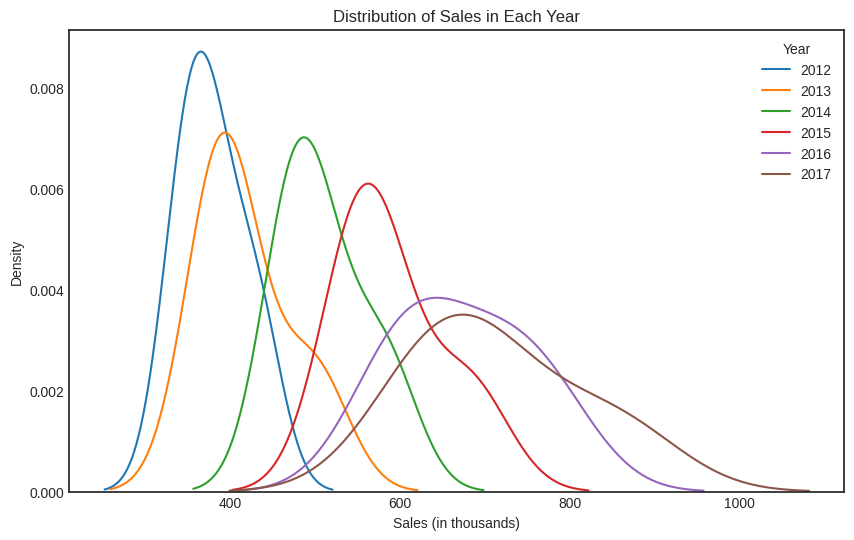

In [ ]:
# Distribution plot of each year

# Set the plot size
plt.figure(figsize=(10, 6))

# Loop through each year to add a KDE plot for the sales distribution
for year in sorted(data['Year'].unique()):
    yearly_data = data[data['Year'] == year]['Sales']
    sns.distplot(yearly_data, hist=False, kde=True, label=str(year))

plt.title('Distribution of Sales in Each Year')
plt.xlabel('Sales (in thousands)')
plt.ylabel('Density')
plt.legend(title='Year')
plt.show()

## Interpretation of Distribution of Sales in Each Year <br>

The Kernel Density Estimate (KDE) plot shows how the sales distributions have evolved over the six years. The KDE plot helps visualize where the data concentrates over the interval.<br>

**1. Shift of Distribution Peaks from 2012 to 2017** <br>
**Observation:** The peaks of the distributions clearly shift to the right from 2012 through to 2017. <br>

**Interpretation:** This rightward shift indicates that the median and mean sales values have increased over the years. A move towards higher sales values suggests growth in sales figures, which can be interpreted as business expansion. <br>

**2. Change in the Width of the Distributions from 2012 to 2017** <br>
**Observation:** The width of the distributions broaden noticeably from 2012 to 2017. The 2017 distribution, in particular, is wider than earlier years. <br>

**Interpretation:** An increasing width in the distributions year-over-year signifies that the variability in sales is also increasing. This could mean the sales outcomes are becoming less predictable and more influenced by external factors or that the company's market conditions are becoming more dynamic. A wider distribution can also indicate that while the company reaches higher sales peaks, it may also experience significant dips, reflecting potentially unstable market conditions or varied effectiveness of sales strategies.The broadening of the distributions suggests increased sales volatility. <br>

#### Visualize the quarterly sales for each year using a stacked bar plot (1 point)

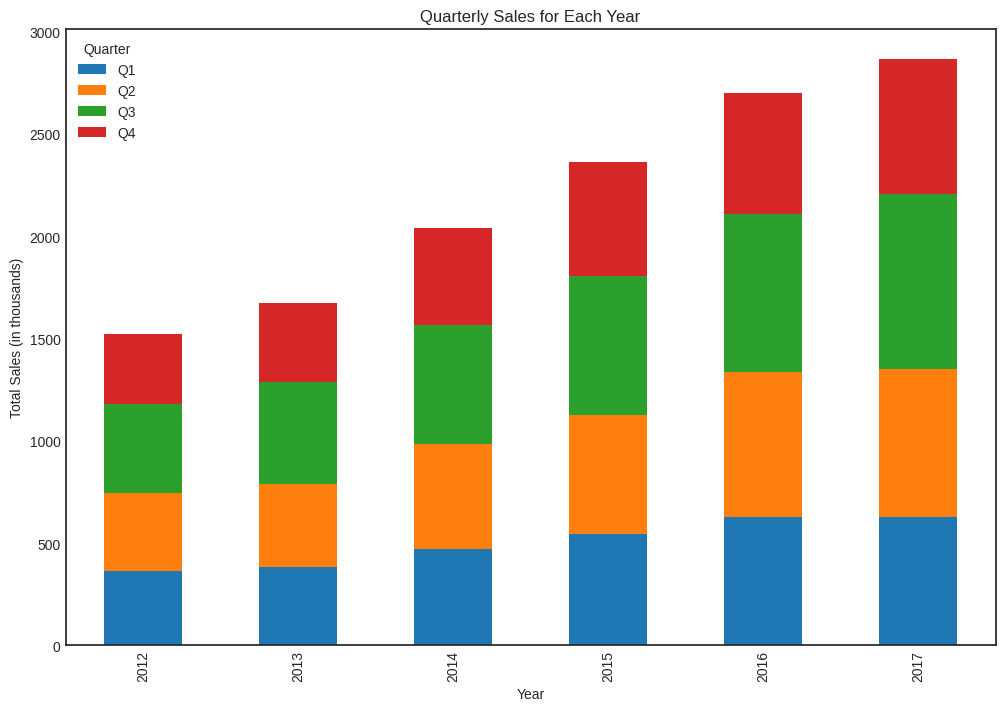

In [ ]:
# Plot stacked bar plot

# Prepare the data for plotting
data['Quarter'] = data.index.quarter
yearly_quarterly_sales = data.groupby(['Year', 'Quarter'])['Sales'].sum().unstack()

# Plotting the stacked bar plot
yearly_quarterly_sales.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Quarterly Sales for Each Year')
plt.xlabel('Year')
plt.ylabel('Total Sales (in thousands)')
plt.legend(title='Quarter', labels=['Q1', 'Q2', 'Q3', 'Q4'])
plt.show()

#### Check if the time series data is stationary (1 point)

Hint:

For the series to be stationary, it must have:
 - constant mean
 - constant variance
 - constant covariance (uncorrelated)

Visualize if the mean is constant

Hint: [Rolling mean](https://pandas.pydata.org/docs/reference/api/pandas.core.window.rolling.Rolling.mean.html)

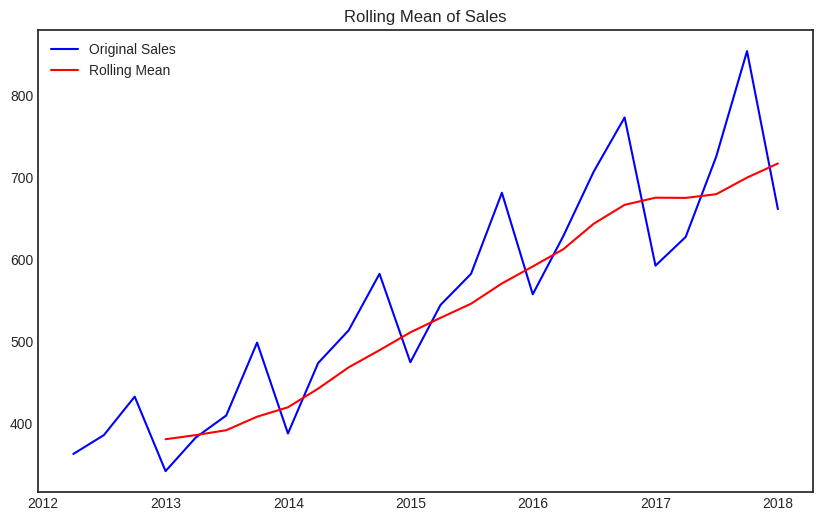

In [ ]:
# Visualize Rolling mean
rolling_window = 4  # As data is quarterly, a window of 4 covers one year
rolling_mean = data['Sales'].rolling(window=rolling_window).mean()

# Plotting rolling statistics
plt.figure(figsize=(10, 6))
plt.plot(data['Sales'], color='blue', label='Original Sales')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean of Sales')
plt.show()

Visualize if the variance is constant

Hint: [Rolling standard deviation](https://pandas.pydata.org/docs/reference/api/pandas.core.window.rolling.Rolling.std.html)

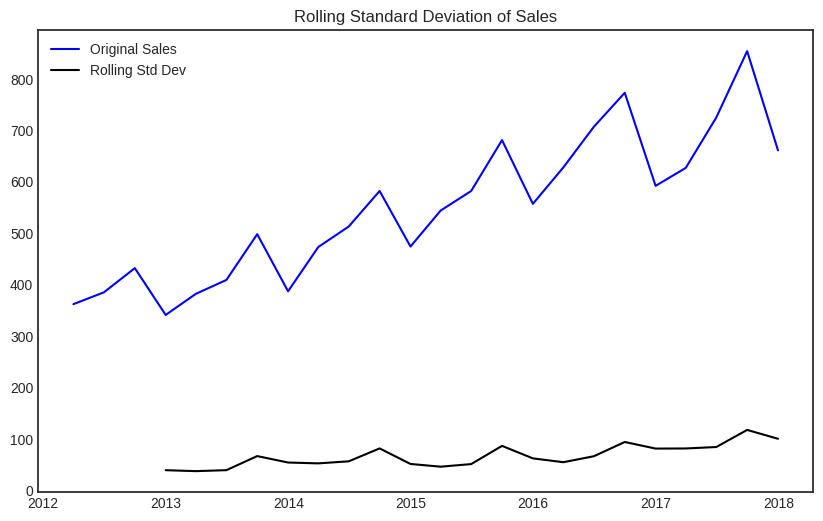

In [ ]:
# Rolling standard deviation
rolling_window = 4  # As data is quarterly, a window of 4 covers one year
rolling_std = data['Sales'].rolling(window=rolling_window).std()

# Plotting rolling statistics
plt.figure(figsize=(10, 6))
plt.plot(data['Sales'], color='blue', label='Original Sales')
plt.plot(rolling_std, color='black', label='Rolling Std Dev')
plt.legend(loc='best')
plt.title('Rolling Standard Deviation of Sales')
plt.show()

Based on the observations report whether the series is stationary or not.

# Analysis of Rolling Mean and Standard Deviation <br>

**1. Rolling Mean Analysis:** <br>

The rolling mean plot shows a clear upward trend over the years.
The mean is not constant but instead increases significantly, particularly from around 2014 onward. <br>

**2. Rolling Standard Deviation Analysis:** <br>

The rolling standard deviation appears relatively stable and low compared to the scale of sales. <br>
Despite slight fluctuations, the rolling standard deviation does not show a trend but remains around the same level throughout the period. <br>

**3. Conclusion on Stationarity** <br>

Non-Stationarity: The time series is not stationary based on the rolling mean plot. For a time series to be considered stationary, it must have a constant mean, constant variance, and covariance that does not depend on time. In this case: <br>

**Mean:** The mean is clearly not constant, displaying a noticeable upward trend. <br>
**Variance:** While the rolling standard deviation is relatively stable, the presence of an increasing mean over time influences the overall decision about stationarity. <br>

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
adf_result = adfuller(data['Sales'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'\t{key}: {value}')

# Report based on the ADF test
if adf_result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")

ADF Statistic: -1.4590726848496414
p-value: 0.5536516971450774
Critical Values:
	1%: -3.9644434814814815
	5%: -3.0849081481481484
	10%: -2.6818144444444445
The series is not stationary.


# ADF Test Results Interpretation <br>
**1. ADF Statistic:** <br>
 The ADF statistic is a number that you compare against the critical values. The more negative the ADF statistic, the stronger the rejection of the hypothesis that the series has a unit root (i.e., is non-stationary). <br>

**Null Hypothesis:**The  Null hypothesis is non-stationary.

**Value:** -1.4591 <br>
**p-value:** The p-value indicates the probability that the series has a unit root. <br>

**Value:** 0.5537 <br>
**Interpretation:** A p-value above 0.05 (typical threshold for statistical significance) suggests that we fail to reject the null hypothesis of non-stationarity. Here, the p-value is well above 0.05, indicating strong evidence that the series is non-stationary. <br>

**2. Critical Values:** <br>
 These are the threshold values for the ADF statistic at various confidence levels. <br>

1%: -3.9644 <br>
5%: -3.0849 <br>
10%: -2.6818 <br>

#### Visualize the patterns in time series - trend, seasonality, residuals (1 point)

Hint: See Module 6 - AST3 EDA > Patterns in a time series

Refer the plots above

### **Detrending**

####  Detrend the time series (0.5 point)

Detrending a time series is to remove the trend component from a time series.

Hint:
- Subtract the line of best fit `scipy.signal.detrend()`

In [ ]:
from scipy.signal import detrend

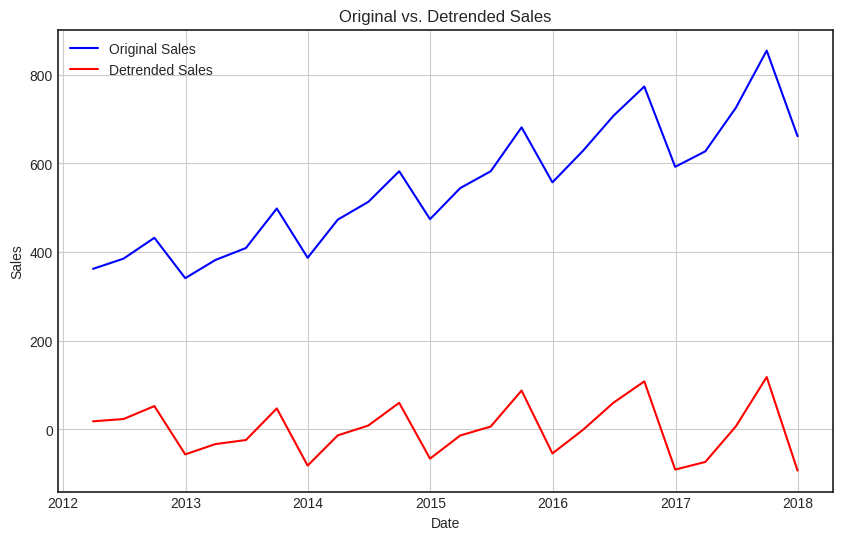

In [ ]:
# Detrend the time series data
data['Detrended_Sales'] = detrend(data['Sales'])

# Plotting the original and detrended data for comparison
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Sales'], label='Original Sales', color='blue')
plt.plot(data.index, data['Detrended_Sales'], label='Detrended Sales', color='red')
plt.title('Original vs. Detrended Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

### **Lag Plots** (Optional)

#### Visualize the Lag plots

A Lag plot is a scatter plot of a time series against a lag of itself. It is normally used to check for autocorrelation. If there is any pattern existing in the series, the series is autocorrelated. If there is no such pattern, the series is likely to be random white noise.

For reference, see Module 6 - AST3 > Lag Plots

Hint: `pandas.plotting.lag_plot()`

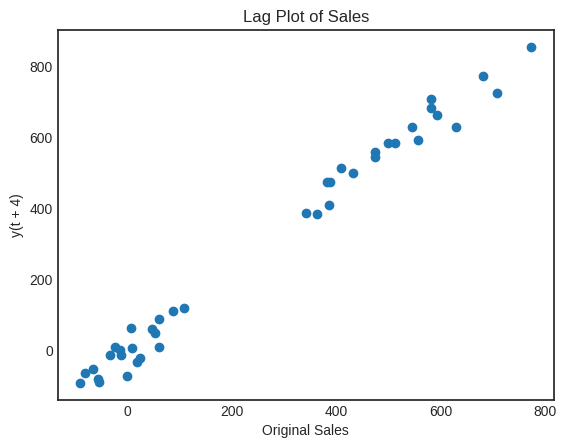

In [ ]:
import pandas.plotting as pd_plotting
# Create a lag plot with a lag of 1
pd_plotting.lag_plot(data, lag=4)
plt.title('Lag Plot of Sales')
plt.xlabel('Original Sales')

# Show the plot
plt.show()

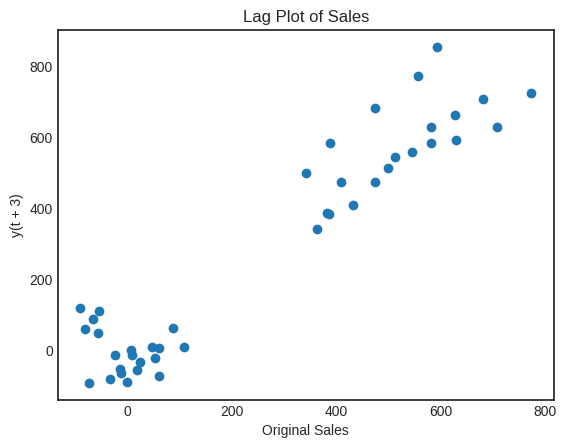

In [ ]:
# Create a lag plot with a lag of 3
pd_plotting.lag_plot(data, lag=3)
plt.title('Lag Plot of Sales')
plt.xlabel('Original Sales')

# Show the plot
plt.show()

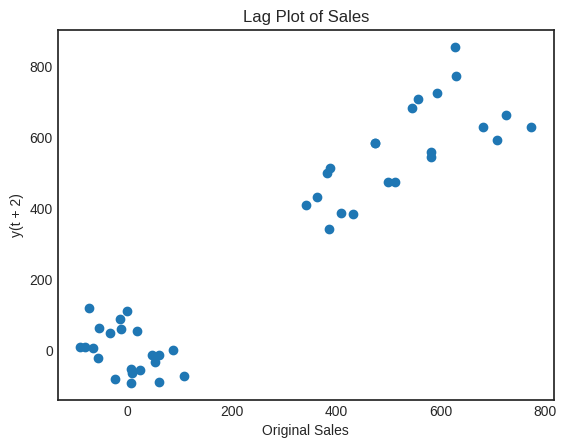

In [ ]:
# Create a lag plot with a lag of 2
pd_plotting.lag_plot(data, lag=2)
plt.title('Lag Plot of Sales')
plt.xlabel('Original Sales')

# Show the plot
plt.show()

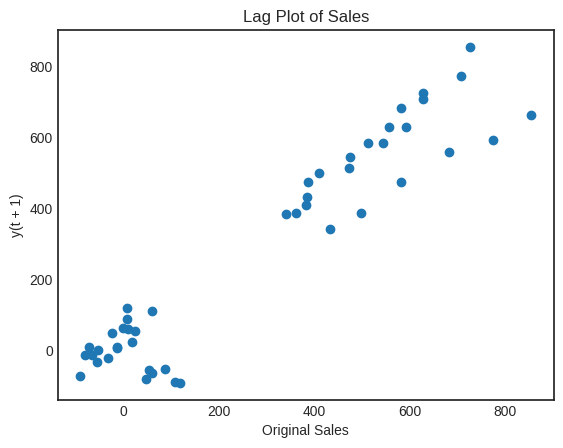

In [ ]:
# Create a lag plot with a lag of 1
pd_plotting.lag_plot(data, lag=1)
plt.title('Lag Plot of Sales')
plt.xlabel('Original Sales')

# Show the plot
plt.show()

scatter plot between variable and lagged variable.

<Figure size 2000x200 with 0 Axes>

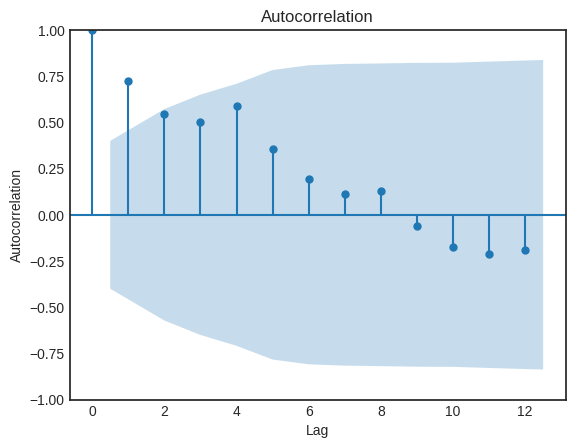

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
# Visualize white noise autocorrelation
plt.figure(figsize=(20, 2))
#plt.plot(data)
#plt.title("White noise")

plot_acf(data['Sales'])
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()

Blue region is the significant range and the columns inside the region has highest correlation.

### Report Analysis

- Give the summary about this time series